In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#### Import Dataset

In [2]:
dataset = pd.read_csv('sms.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [3]:
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [4]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
dataset.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
from sklearn.utils import shuffle

dataset = shuffle(dataset)
dataset.head()

,text,spam
5673,"Subject: re : part - time work cantekin , i ...",0
1592,Subject: re : a personal favor thanks very mu...,0
3238,Subject: thanks again vince : i ' m looking ...,0
3187,Subject: change of role just a quick note to ...,0
4168,Subject: vp & director count for the research ...,0


#### Clean SMS text data

In [7]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

english_stopwords = stopwords.words('english')
english_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mosope/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:

def clean_text(message):
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.lower()
    message = message.split()
    
    stemmer = SnowballStemmer('english')
    message = [stemmer.stem(word) for word in message if word not in english_stopwords]
    message = ' '.join(message)
    
    return message

In [9]:
dataset['text'] = dataset['text'].apply(clean_text)

In [10]:
dataset

,text,spam
5673,subject part time work cantekin shall call tom...,0
1592,subject person favor thank much attach resum r...,0
3238,subject thank vinc look forward get outlin eco...,0
3187,subject chang role quick note say left eprm ri...,0
4168,subject vp director count research group hello...,0
...,...,...
302,subject v want know archimedean save piil http...,1
1775,subject esai gas power alert impact gas price ...,0
501,subject heart busi corpor imag say lot thing c...,1
2544,subject forecast project per monday meet time ...,0


#### Text feature extraction - Create bag of words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['text']).toarray()
y = dataset['spam'].values


In [13]:
X.shape

(5728, 25607)

In [14]:
np.set_printoptions(threshold=np.inf)

print(vectorizer.get_feature_names_out())

['aa' 'aaa' 'aaaenerfax' 'aadedeji' 'aagraw' 'aal' 'aaldous' 'aaliyah'
 'aall' 'aanalysi' 'aaron' 'aawesom' 'ab' 'aba' 'abacha' 'abacus' 'abahi'
 'abaixo' 'abandon' 'abargain' 'abarr' 'abattoir' 'abb' 'abba'
 'abbestellen' 'abbott' 'abbrevi' 'abc' 'abcsearch' 'abdalla' 'abdallat'
 'abdelnour' 'abdul' 'abdulla' 'abdullah' 'abei' 'abel' 'abello' 'aber'
 'abernathi' 'abet' 'abey' 'abf' 'abhay' 'abi' 'abid' 'abidjan' 'abiiiti'
 'abil' 'abilen' 'abilmesi' 'abit' 'abitibi' 'abklaeren' 'abl' 'abler'
 'abli' 'ablig' 'ablx' 'abn' 'abneg' 'abnorm' 'aboard' 'abolish' 'abond'
 'abook' 'aborigin' 'aborm' 'abort' 'about' 'aboutthi' 'aboutus'
 'aboutvenita' 'aboveground' 'abovenet' 'abovetelefax' 'abqewvbgf' 'abr'
 'abraham' 'abram' 'abramov' 'abramowicz' 'abras' 'abreast' 'abreo'
 'abridg' 'abroad' 'abscissa' 'abscond' 'absenc' 'absens' 'absent'
 'absolut' 'absolv' 'absorb' 'absorbowac' 'absorpt' 'absout' 'abspielt'
 'abstain' 'abstract' 'abstrus' 'absult' 'absurd' 'abu' 'abuja' 'abund'
 'abundanceg

#### Train Naive Bayes Models (Gaussian & Multinomial)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(X = X_train, y = y_train)

mnb_classifier = MultinomialNB()
mnb_classifier.fit(X = X_train, y = y_train)

MultinomialNB()

#### Test and Evaluate models

In [17]:
gnb_y_pred = gnb_classifier.predict(X_test)
mnb_y_pred = mnb_classifier.predict(X_test)

##### evaluating Gaussian model

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       883
           1       0.92      0.91      0.91       263

    accuracy                           0.96      1146
   macro avg       0.94      0.94      0.94      1146
weighted avg       0.96      0.96      0.96      1146



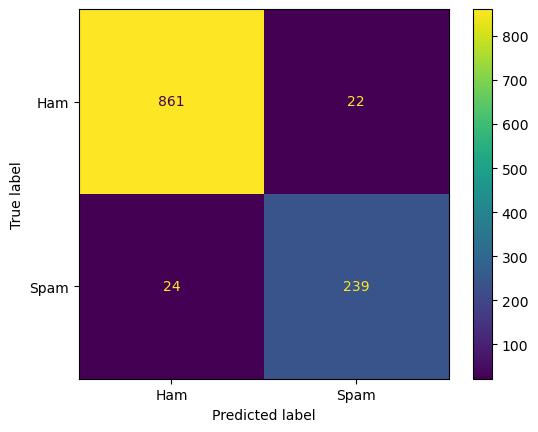

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, gnb_y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam']).plot()
print(classification_report(y_test, gnb_y_pred))

#### Evaluating Multinomial model

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       883
           1       0.98      0.99      0.99       263

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



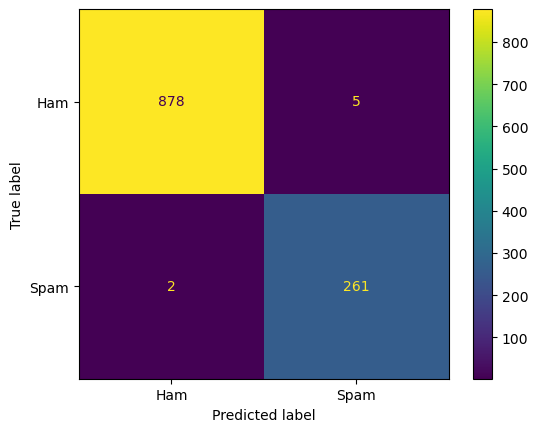

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, mnb_y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam']).plot()
print(classification_report(y_test, mnb_y_pred))